In [29]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

from IPython.display import display
df = pd.read_excel("D:datasets\mldata\RunData.XLS",sheet_name = '#1')
df.head()

,UnitNum,DetailTime,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,...,Tag57,Tag58,Tag59,Tag60,Tag61,Tag62,Tag63,Tag64,Tag65,Tag66
0,单位,NaN,t/h,t/h,℃,kPa,℃,NaN,kPa,℃,...,kPa,℃,%,r/min,h,MW,NaN,NaN,NaN,NaN
1,说明,时间,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
2,1,2014-12-29 08:16:08,2342.718896,49.262232,5.810559,101.983559,5.166665,15.798577,101.192748,379.742126,...,5.240098,11.046362,58.938324,3000.36499,35199.289062,376.40625,0.377813,49.506954,1729.717773,547.51239
3,1,2014-12-25 08:56:08,2342.678906,48.26388,5.146191,103.060494,4.682627,15.78881,102.283836,373.842743,...,6.11194,12.450884,65.561295,2999.987549,35124.476562,376.387146,0.643795,49.5746,1701.042114,539.792358
4,1,2014-12-29 08:17:07.797000,2343.090234,49.262579,6.192057,101.983486,5.138834,15.798322,101.190896,379.542938,...,5.24446,11.071339,57.544735,3000.166016,35199.304688,376.319122,0.37971,49.508347,1706.046997,547.743958


In [27]:
df.shape

(8694, 68)

In [30]:
col_rename = []
for i in range(0,68):
    col_rename.append(df.iloc[1,i])
df.columns = col_rename
df = df.drop([0,1],axis='index').reset_index(drop=True)
df.head()

,说明,时间,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
0,1,2014-12-29 08:16:08,2342.718896,49.262232,5.810559,101.983559,5.166665,15.798577,101.192748,379.742126,...,5.240098,11.046362,58.938324,3000.36499,35199.289062,376.40625,0.377813,49.506954,1729.717773,547.51239
1,1,2014-12-25 08:56:08,2342.678906,48.26388,5.146191,103.060494,4.682627,15.78881,102.283836,373.842743,...,6.11194,12.450884,65.561295,2999.987549,35124.476562,376.387146,0.643795,49.5746,1701.042114,539.792358
2,1,2014-12-29 08:17:07.797000,2343.090234,49.262579,6.192057,101.983486,5.138834,15.798322,101.190896,379.542938,...,5.24446,11.071339,57.544735,3000.166016,35199.304688,376.319122,0.37971,49.508347,1706.046997,547.743958
3,1,2014-12-25 08:57:08,2338.553101,48.2672,4.52215,103.060957,4.720131,15.788899,102.289666,373.534363,...,6.115463,12.45035,63.492619,3001.228027,35124.492188,376.30957,0.645896,49.575893,1683.886597,538.26593
4,1,2014-12-25 08:58:07.797000,2340.647314,48.27052,5.741402,103.061421,4.759082,15.788988,102.302531,373.56601,...,6.118979,12.449816,66.488007,3000.366211,35124.507812,376.232025,0.647996,49.57719,1684.195312,539.347046


In [32]:
print(type(df['时间'][0]))
from datetime import datetime
from datetime import time

df['时间'] = df['时间'].apply(lambda x:(x.year*360*30*24*60+x.month*30*24*60+x.day*24*60+x.hour*60+x.minute))
print(df['时间'])
#df['时间'] = pd.to_datetime(df['时间'])
#print((df['时间']))
#print(df['时间'].strftime('%Y-%m-%d %H:%M:%S'))

<class 'datetime.datetime'>
0       31322288656
1       31322282936
2       31322288657
3       31322282937
4       31322282938
           ...     
8687    31322284227
8688    31322284226
8689    31322288524
8690    31322284225
8691    31322284224
Name: 时间, Length: 8692, dtype: int64


In [40]:
df = df.astype(float)
corr = df.corr()
corr

,说明,时间,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
说明,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
时间,NaN,1.000000,-0.126334,-0.177381,-0.065976,0.070835,0.056916,-0.173384,0.097850,-0.111047,...,-0.016632,-0.096263,-0.083109,0.001568,0.077825,-0.146337,-0.117483,-0.018723,-0.105773,-0.101870
空气质量流量,NaN,-0.126334,1.000000,0.764623,0.285004,-0.052913,-0.331431,0.824999,-0.284591,0.904867,...,0.340357,0.236511,0.186897,0.430586,0.007148,0.922631,0.227040,0.434749,0.822614,0.813385
天然气质量流量,NaN,-0.177381,0.764623,1.000000,0.357910,-0.176697,-0.288982,0.954708,-0.347414,0.743610,...,0.434626,0.316767,0.146009,0.315263,0.147155,0.852796,0.446133,0.361064,0.586040,0.579156
大气温度,NaN,-0.065976,0.285004,0.357910,1.000000,-0.415992,0.654913,0.353011,-0.482495,0.532511,...,0.519856,0.309765,-0.555676,0.059526,0.301563,0.320528,0.401026,0.107207,0.195192,0.224316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
联合循环功率,NaN,-0.146337,0.922631,0.852796,0.320528,-0.088019,-0.401583,0.875553,-0.303783,0.821371,...,0.454180,0.416693,0.227219,0.261914,0.057401,1.000000,0.362401,0.284462,0.775400,0.771322
联合循环功率因素,NaN,-0.117483,0.227040,0.446133,0.401026,-0.074028,0.073354,0.380038,-0.123129,0.331840,...,0.589747,0.529009,-0.107079,0.160686,0.136660,0.362401,1.000000,0.249557,0.053287,0.065353
联合循环频率,NaN,-0.018723,0.434749,0.361064,0.107207,-0.042426,0.029912,0.396133,-0.105510,0.647376,...,-0.095394,-0.040889,0.002517,0.989895,0.077343,0.284462,0.249557,1.000000,0.301647,0.268456
联合循环励磁电流,NaN,-0.105773,0.822614,0.586040,0.195192,0.022292,-0.312876,0.646423,-0.170961,0.719196,...,0.129010,0.109039,0.218225,0.297513,-0.091839,0.775400,0.053287,0.301647,1.000000,0.993929


In [44]:
corr['联合循环功率'].sort_values(ascending =False)[0:8]

联合循环功率             1.000000
中压过热器出口蒸汽流量        0.969786
低压缸进口蒸汽压力          0.955425
高压过热器出口蒸汽流量        0.942817
空气质量流量             0.922631
高压省煤器出口水温度         0.913648
余热锅炉高压蒸发器出口烟气温度    0.912363
低压给水流量             0.905854
Name: 联合循环功率, dtype: float64

In [40]:
df.corr() > 0.9

,说明,时间,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
说明,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
时间,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
空气质量流量,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
天然气质量流量,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
大气温度,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
联合循环功率,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
联合循环功率因素,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
联合循环频率,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
联合循环励磁电流,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [42]:
print(df.corr().iloc[3,7])

0.9547082852055262


In [50]:
import math
num = 0

for i in range(0,68):
    for j in range(i,68):
        if(math.fabs(df.corr().iloc[i,j]) > 0.9):
            if(i == j):
                continue
            print(i,j)


2 9
2 11
2 25
2 47
2 63
3 7
3 10
3 14
5 8
5 19
7 10
7 14
8 19
9 47
10 14
13 16
15 33
18 50
22 30
22 35
22 39
22 42
22 43
22 54
22 63
23 26
23 28
23 33
23 39
23 42
24 29
25 47
25 50
26 28
26 31
26 51
26 53
27 52
28 31
28 35
28 39
28 42
28 43
28 51
28 53
28 54
30 35
30 39
30 42
30 43
30 54
30 63
31 51
31 53
32 44
34 40
34 41
35 36
35 39
35 42
35 43
35 46
35 54
35 63
36 43
36 46
36 47
37 45
39 42
39 43
39 54
39 63
40 41
42 43
42 54
42 63
43 46
43 47
46 47
48 49
51 53
54 63
55 57
61 65
66 67


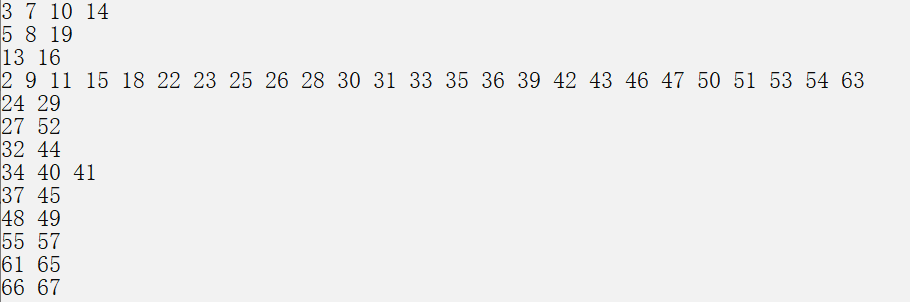

In [ ]:
import math
num = 0

for i in range(0,68):
    for j in range(i,68):
        if(math.fabs(df.corr(method = 'kendall').iloc[i,j]) > 0.9):
            if(i == j):
                continue
            print(i,j)

Index(['天然气质量流量', '压气机压比', '压气机出口空气压力', '透平压比'], dtype='object')


<AxesSubplot:>

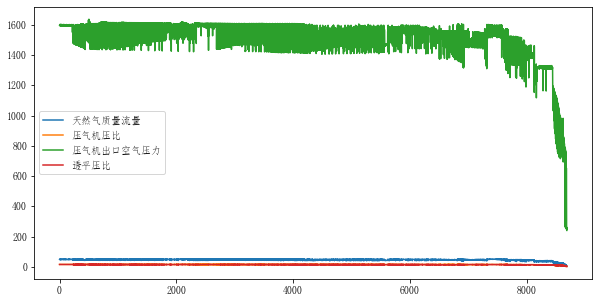

In [43]:
columns = df.columns[[3,7,10,14]]
print(columns)
test1 = df[columns]
test1.plot(figsize=(10,5))

In [ ]:
columns = df.columns[[66,67]]
print(columns)
test1 = df[columns]
test1.plot(figsize=(10,5))

In [6]:
df.iloc[0:,1:]

,时间,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,压气机出口空气压力,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
0,2535368.0,2342.718896,49.262232,5.810559,101.983559,5.166665,15.798577,101.192748,379.742126,1595.950372,...,5.240098,11.046362,58.938324,3000.364990,35199.289062,376.406250,0.377813,49.506954,1729.717773,547.512390
1,2192168.0,2342.678906,48.263880,5.146191,103.060494,4.682627,15.788810,102.283836,373.842743,1596.508302,...,6.111940,12.450884,65.561295,2999.987549,35124.476562,376.387146,0.643795,49.574600,1701.042114,539.792358
2,2535427.0,2343.090234,49.262579,6.192057,101.983486,5.138834,15.798322,101.190896,379.542938,1595.923091,...,5.244460,11.071339,57.544735,3000.166016,35199.304688,376.319122,0.379710,49.508347,1706.046997,547.743958
3,2192228.0,2338.553101,48.267200,4.522150,103.060957,4.720131,15.788899,102.289666,373.534363,1596.556450,...,6.115463,12.450350,63.492619,3001.228027,35124.492188,376.309570,0.645896,49.575893,1683.886597,538.265930
4,2192287.0,2340.647314,48.270520,5.741402,103.061421,4.759082,15.788988,102.302531,373.566010,1596.604597,...,6.118979,12.449816,66.488007,3000.366211,35124.507812,376.232025,0.647996,49.577190,1684.195312,539.347046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,2269627.0,53.708114,5.201380,4.427472,103.043340,7.951758,2.513996,103.043445,45.174873,247.533168,...,12.208687,11.942761,38.030556,7.957157,35137.863281,5.414620,0.373722,0.000000,2.704891,0.361936
8688,2269567.0,43.799613,5.117504,4.196513,103.043112,8.024069,2.490653,103.043456,45.225067,245.254173,...,12.105058,11.948999,38.703308,7.977547,35137.863281,3.993966,0.371643,0.000000,1.704085,0.360759
8689,2527447.0,50.942447,6.802403,5.619564,101.993218,8.747654,2.877498,101.990213,47.204899,260.693962,...,5.296905,13.621019,43.606380,36.679943,35198.039062,2.643880,0.127376,0.000000,-2.997820,0.273741
8690,2269507.0,60.840981,5.033628,3.965554,103.042884,8.096379,2.467310,103.043467,45.275265,242.975178,...,12.001429,11.955237,38.030239,7.997937,35137.859375,2.573313,0.369565,0.000000,0.132506,0.359581


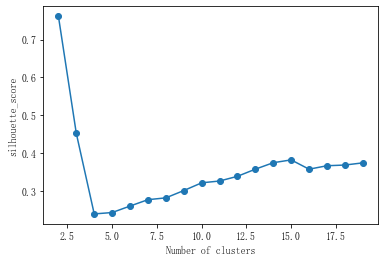

In [7]:
from sklearn.cluster import KMeans  # 导入kmeans算法
from sklearn import metrics

X = np.array(df.iloc[0:,1:])


from sklearn.preprocessing import StandardScaler
X_train_reduction = StandardScaler().fit_transform(X)  #标准化数据

scores = []
for i in range(2, 20):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=20,
                max_iter=300,
                random_state=0)
    km.fit(X_train_reduction)
    scores.append(metrics.silhouette_score(X_train_reduction, km.labels_ , metric='euclidean'))
plt.plot(range(2,20), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X_train_reduction)
y_train = kmeans.labels_


In [29]:
print(df.columns[1])

时间


In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2,random_state=123)
clf.fit(X_train_reduction, y_train)

print(clf.feature_importances_)
ipt = clf.feature_importances_.argsort()+1
#print(ipt)
print(df.columns[ipt[-1:-10:-1]])

[1.06470856e-04 1.62785719e-04 1.12686684e-02 0.00000000e+00
 0.00000000e+00 1.63180085e-03 5.37128220e-03 4.29403786e-04
 1.58352561e-03 1.00795920e-02 1.01056222e-02 4.53502756e-04
 1.81688062e-02 7.56769239e-04 1.80348794e-02 3.79993619e-02
 0.00000000e+00 0.00000000e+00 9.16173814e-05 7.64727099e-04
 9.94207421e-05 8.50376259e-03 2.74845675e-02 0.00000000e+00
 1.18887546e-03 4.79870159e-02 0.00000000e+00 1.46837299e-01
 0.00000000e+00 8.94966012e-02 3.60136560e-02 8.29940495e-05
 1.78879902e-02 6.00821510e-04 8.88916588e-02 0.00000000e+00
 6.42356315e-04 1.96175441e-03 5.82347091e-02 8.33620063e-03
 0.00000000e+00 3.86659905e-02 3.00865379e-02 0.00000000e+00
 0.00000000e+00 1.30860709e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.77429491e-02 0.00000000e+00
 2.69313588e-02 1.44147195e-01 1.48410715e-04 0.00000000e+00
 4.26180747e-04 0.00000000e+00 0.00000000e+00 2.68120788e-03
 0.00000000e+00 0.00000000e+00 6.00755432e-02 0.00000000e+00
 0.00000000e+00 0.000000

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X_train_reduction, y_train)
print(clf.feature_importances_.argsort()+1)
           
ipt = clf.feature_importances_.argsort()+1
#print(ipt)
print(df.columns[ipt[-1:-10:-1]])


[21 24  5  8 49 48 19 62 52  1 27 61 45  4 50 65 57 58 56 18 20 11 37 36
 64 47 44 66 55 60 29 67 46 59 32  9 25 40  2 17 33 12 10  6 14 23 15 38
 39  3 13 41 43 35 22  7 51 34 42 53 26 16 31 28 54 30 63]
Index(['联合循环功率', '中压过热器出口蒸汽流量', '低压缸进口蒸汽压力', '中压过热器出口蒸汽温度', '再热器进口蒸汽温度',
       '余热锅炉入口烟气温度', '再热器出口蒸汽温度', '低压缸进口蒸汽温度', '高压省煤器出口水温度'],
      dtype='object')


In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

names = np.array(df.columns[1:68])
rf = RandomForestRegressor()
#use linear regression as the model
#lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_reduction, y_train)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, '中压过热器出口蒸汽流量'), (1, '低压缸进口蒸汽压力'), (1, '低压缸进口蒸汽温度'), (1, '低压过热器出口蒸汽温度'), (1, '余热锅炉低压蒸发器出口烟气温度'), (1, '压气机出口空气压力'), (1, '压气机压比'), (1, '大气湿度'), (1, '联合循环频率'), (1, '高压过热器出口蒸汽流量'), (2, '中压省煤器出口水压力'), (3, '高压缸排气温度'), (4, '低压省煤器出口水压力'), (5, '燃烧室进口天然气温度'), (6, '低压汽包压力'), (7, '透平压比'), (8, '凝汽器温度'), (9, '转速'), (10, '透平出口烟气压力'), (11, '大气压力与压气机进口压力之差'), (12, '中压省煤器出口水温度'), (13, '透平出口烟气温度'), (14, '压气机出口空气温度'), (15, '压气机进口空气压力'), (16, '余热锅炉入口烟气温度'), (17, '低压缸排气温度'), (18, '中压汽包压力'), (19, '高压省煤器出口水温度'), (20, '余热锅炉中压蒸发器出口烟气温度'), (21, '余热锅炉入口烟气压力'), (22, '余热锅炉出口烟气压力'), (23, '高压缸排气压力'), (24, '余热锅炉出口烟气温度'), (25, '低压给水压力'), (26, '低压给水温度'), (27, '低压省煤器出口水温度'), (28, '高压省煤器出口水压力'), (29, '再热器出口蒸汽压力'), (30, '低压过热器出口蒸汽压力'), (31, '联合循环励磁电流'), (32, '低压过热器出口蒸汽流量'), (33, '再热器进口蒸汽压力'), (34, '高压过热器出口蒸汽温度'), (35, '联合+A3+AT3:AT3:BP3'), (36, '联合循环功率'), (37, '再热器进口蒸汽温度'), (38, '低压给水流量'), (39, '中压过热器出口蒸汽温度'), (40, '天然气加热器进口燃气温度'), (41, '凝汽器压力'), (42, '低压缸排气压力'), (43, '中压过热器出口蒸汽压力'), (44,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import warnings #警告
from sklearn.preprocessing import MinMaxScaler #归一化

#LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
# from keras.optimizers import SGD 
from tensorflow.keras.optimizers import Adam,Nadam, SGD  #随机梯度下降法


mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 不使用unicode_minus模式处理坐标轴轴线为负数的情况
warnings.filterwarnings("ignore") #去掉警告

# import sys
# print('当前 Python 解释器路径：')
# print(sys.executable)

# import platform 
# print(platform.python_version())

In [2]:
data = pd.read_excel('D:\datasets\mldata\RunData.XLS',
                     sheet_name = '#1',
                     index_col='DetailTime',
                     ) #日期作为索引
data
data.sort_values('DetailTime', ascending=True).head(20) #按日期升序
# data.head(100)

,UnitNum,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,Tag9,...,Tag57,Tag58,Tag59,Tag60,Tag61,Tag62,Tag63,Tag64,Tag65,Tag66
DetailTime,,,,,,,,,,,,,,,,,,,,,
2014-12-15 06:24:08.000,说明,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,压气机出口空气压力,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
2014-12-24 18:39:07.797,1,2317.957031,49.391211,10.807205,102.822566,10.029416,15.737673,102.04405,383.726349,1610.352311,...,7.319601,12.892888,26.289129,3000.346436,35117.304688,370.302521,0.993185,49.52607,1409.511597,431.479187
2014-12-24 18:40:07.797,1,2317.783667,49.402081,11.11462,102.822688,10.032444,15.737981,102.038675,383.646027,1610.402548,...,7.318128,12.89447,26.490431,3000.032471,35117.320312,370.267059,0.993173,49.522842,1376.556519,429.780457
2014-12-24 18:41:07.797,1,2317.610522,49.412947,11.236652,102.82281,10.035472,15.738289,102.036078,383.565735,1610.452691,...,7.316655,12.896051,26.551908,2999.983398,35117.335938,370.231567,0.99316,49.519615,1379.290283,430.574371
2014-12-24 18:42:07.797,1,2317.132397,49.423813,10.373202,102.822924,10.0385,15.738597,102.036096,383.186523,1610.50292,...,7.315174,12.897633,25.433723,3000.835449,35117.351562,370.196106,0.993147,49.516392,1404.035767,432.577698
2014-12-24 18:43:07.797,1,2307.988037,49.434679,10.109568,102.823046,10.041528,15.738905,102.041705,382.423706,1610.553063,...,7.313693,12.899215,25.992058,3001.058594,35117.371094,370.160614,0.993134,49.513165,1384.723877,432.177429
2014-12-24 18:44:07.797,1,2309.378906,49.445546,11.141527,102.823168,10.044556,15.739214,102.043278,381.660919,1610.6033,...,7.31222,12.900796,26.063684,3001.02832,35117.386719,370.125153,0.993121,49.509937,1368.097534,432.508453
2014-12-24 18:45:07.797,1,2311.826001,49.456412,11.363049,102.823291,10.047584,15.739522,102.037522,382.037048,1610.653443,...,7.310747,12.902378,26.359789,3000.997803,35117.402344,370.089661,0.993108,49.50671,1392.134521,432.530731
2014-12-24 18:46:07.797,1,2314.340771,49.467278,10.293057,102.823413,10.050611,15.73983,102.030239,382.751099,1610.70368,...,7.309274,12.903959,26.663853,3000.967285,35117.417969,370.054199,0.993096,49.503483,1368.928589,432.075287


In [4]:
print(data.shape)

(8694, 67)


In [3]:
train_set=data[:'2014-12-30'].iloc[:,62:63].values #训练集，获取联合循环功率
test_set=data['2014-12-31':].iloc[:,62:63].values #测试集，获取联合循环功率

train_set2=data[:'2014-12-30'].iloc[:,64:65].values #训练集，获取联合循环频率
test_set2=data['2014-12-31':].iloc[:,64:65].values #测试集，获取联合循环频率

In [13]:
print(train_set[-20:])
print(test_set[-20:])

[[22.789005279541016]
 [21.237565994262695]
 [20.90879249572754]
 [19.207101821899414]
 [18.13353157043457]
 [17.255809783935547]
 [13.602827072143555]
 [10.045818328857422]
 [9.953211784362793]
 [9.949845314025879]
 [9.676580429077148]
 [8.307732582092285]
 [8.255927085876465]
 [6.835273265838623]
 [6.296862602233887]
 [5.4146199226379395]
 [3.9939663410186768]
 [2.6438798904418945]
 [2.573312997817993]
 [1.15265953540802]]
[[278.65216064453125]
 [278.645263671875]
 [278.6433410644531]
 [278.6423645019531]
 [278.6345520019531]
 [278.4713439941406]
 [267.2508239746094]
 [249.79808044433594]
 [227.763671875]
 [212.75]
 [190.88369750976562]
 [177.00506591796875]
 [158.27413940429688]
 [141.02728271484375]
 [122.47246551513672]
 [104.74900817871094]
 [87.06591796875]
 [57.19228744506836]
 [35.88385009765625]
 [17.17129135131836]]


In [9]:
print(data[:'2014-12-30'].iloc[:,62].values.shape)
data[:'2014-12-30'].iloc[:,62:63].values.shape

(7237,)


(7237, 1)

In [100]:
#联合循环功率训练集大小
train_set.shape 
print(test_set.shape)

(1456, 1)


In [62]:
print(test_set)

[[372.3816833496094]
 [372.23248291015625]
 [372.1939392089844]
 ...
 [57.19228744506836]
 [35.88385009765625]
 [17.17129135131836]]


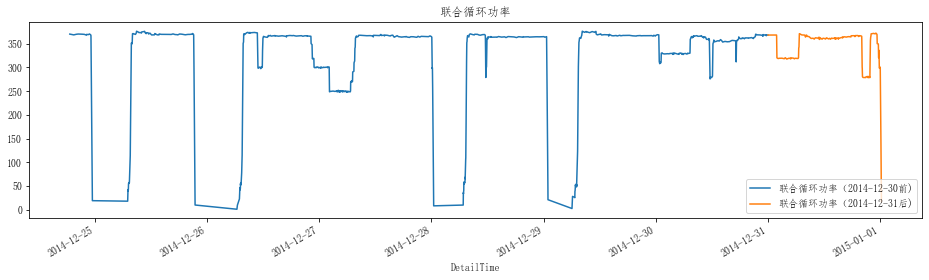

In [12]:
data=data[2:] #选取数据部分，去掉了单位等行
data['Tag62'][:'2014-12-30'].plot(figsize=(16,4),legend=True)
data['Tag62']['2014-12-31':].plot(figsize=(16,4),legend=True)
plt.title('联合循环功率')
plt.legend(['联合循环功率（2014-12-30前)','联合循环功率（2014-12-31后)'])
plt.show()

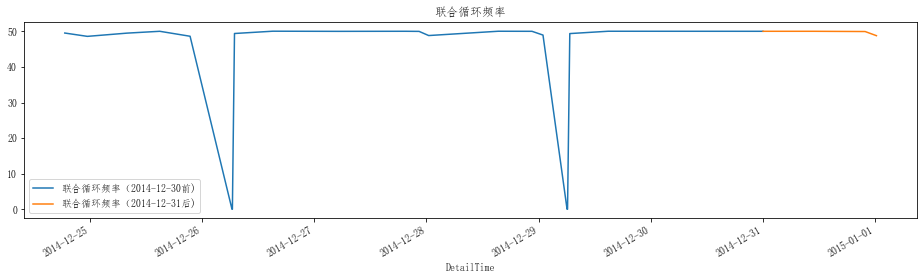

In [52]:
data=data[2:]
data['Tag64'][:'2014-12-30'].plot(figsize=(16,4),legend=True)
data['Tag64']['2014-12-31':].plot(figsize=(16,4),legend=True)
plt.title('联合循环频率')
plt.legend(['联合循环频率（2014-12-30前)','联合循环频率（2014-12-31后)'])
plt.show()

## 归一化处理

归一化（特征缩放）
使用特征缩放的作用是：
* 使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确
* 加快学习算法的收敛速度

缩放过程可以分为以下几种：
* 缩放到均值为0，方差为1（Standardization——StandardScaler()）
* 缩放到0和1之间（Standardization——MinMaxScaler()）
* 缩放到-1和1之间（Standardization——MaxAbsScaler()）
* 缩放到0和1之间，保留原始数据的分布（Normalization——Normalizer()）

In [13]:
#归一化 
#将每一维的特征映射到指定的区间【0，1】
sc=MinMaxScaler(feature_range=[0,1])
train_set_scaled=sc.fit_transform(train_set[1:])   #去掉第一行（名称）


In [14]:
#创建序列数据集（训练和测试）
#60个时间步为一个样本，1个输出
x_train=[]
y_train=[]
for i in range(60,7236):
    x_train.append(train_set_scaled[i-60:i])  #0代表第一列数据
    y_train.append(train_set_scaled[i])

X_train,Y_train=np.array(x_train).astype('float32'),np.array(y_train).astype('float32')   #numpy转换
X_train.shape 

(7176, 60, 1)

In [15]:
#LSTM的输入：(samples,sequence_length,features) 样品，序列长度，特征
#reshape:训练集(7174,60) -->(7174,60,1)
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_train.shape

(7176, 1, 60)

In [73]:
import torch 
from torch import nn
from torch.autograd import Variable
#lstm 网络
class lstm_reg(nn.Module):#括号中的是python的类继承语法，父类是nn.Module类 不是参数的意思
    def __init__(self,input_size,hidden_size, output_size=1,num_layers=2,dropout = 0.2): # 构造函数
        #inpu_size 是输入的样本的特征维度， hidden_size 是LSTM层的神经元个数，
        #output_size是输出的特征维度
        super(lstm_reg,self).__init__()# super用于多层继承使用，必须要有的操作
 
        self.rnn = nn.LSTM(input_size,hidden_size,num_layers,dropout = 0.2)# 两层LSTM网络，
        self.reg = nn.Linear(hidden_size,output_size)#把上一层总共hidden_size个的神经元的输出向量作为输入向量，然后回归到output_size维度的输出向量中
        
    def forward(self,x): #x是输入的数据
        x, _ = self.rnn(x)# 单个下划线表示不在意的变量，这里是LSTM网络输出的两个隐藏层状态
        s,b,h = x.shape
        x = x.view(s*b, h)
        x = self.reg(x)
        x = x.view(s,b,-1)#使用-1表示第三个维度自动根据原来的shape 和已经定了的s,b来确定
        return x
#我使用了GPU加速，如果不用的话需要把.cuda()给注释掉    
net = lstm_reg(60,10)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.05)    

In [74]:
from torch.autograd import Variable
for e in range(10):
    var_x = Variable(torch.from_numpy(X_train)) 
    var_y = Variable(torch.from_numpy(Y_train))
 
    out = net(var_x)
    loss = criterion(out, var_y)
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.item()))
#存储训练好的模型参数        


Epoch: 1, Loss:0.47699
Epoch: 2, Loss:0.03972
Epoch: 3, Loss:0.02615
Epoch: 4, Loss:0.02613
Epoch: 5, Loss:0.02834
Epoch: 6, Loss:0.02394
Epoch: 7, Loss:0.02366
Epoch: 8, Loss:0.02631
Epoch: 9, Loss:0.02566
Epoch: 10, Loss:0.02338


In [83]:
#拼接数据集
dataset_total=pd.concat((data['Tag62'][:'2014-12-30'],data['Tag62']['2014-12-31':]),axis=0) #在纵轴（0轴）进行拼接
#获取输入数据
inputs=dataset_total[len(dataset_total)-len(test_set)-60:].values

In [84]:
inputs

array([46.54159927368164, 46.231834411621094, 45.04301834106445, ...,
       57.19228744506836, 35.88385009765625, 17.17129135131836],
      dtype=object)

In [85]:
#归一化
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

inputs.shape

(1516, 1)

In [86]:
#准备测试集X_test,进行联合循环功率预测
X_test = []
Y_test = []
for i in range(60,1516):
    X_test.append(inputs[i-60:i,0])
    Y_test.append(inputs[i])
X_test = np.array(X_test) #numpy转换
Y_test = np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

(1456, 60)
(1456, 1)


In [87]:
print(Y_test[0:5])

[[0.98927507]
 [0.98887748]
 [0.98877476]
 [0.98839229]
 [0.98827453]]


In [88]:
#转换为LSTM模型需要的三维模式 (samples,sequence_length,features) 样品，序列长度，特征
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [89]:
X_test.shape #三维模式

(1456, 1, 60)

[[372.38168335]
 [372.23248291]
 [372.19393921]
 [372.05041504]
 [372.00622559]]
(1456, 1)


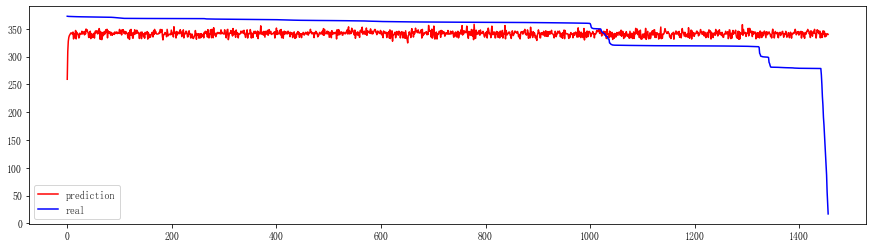

(1456, 1)
1208.3228153399652
34.76093806760636
[[372.38168335]
 [372.23248291]
 [372.19393921]
 [372.05041504]
 [372.00622559]]
[[259.10867]
 [308.87408]
 [327.46222]
 [334.3682 ]
 [337.5188 ]]


In [99]:

pred_test = net(Variable(torch.from_numpy(X_test.astype('float32'))) ).view(-1).data.numpy() # 测试集的预测结果
#print(pred_test.shape)
#先转移到cpu上才能转换为numpy
#print(pred_test.shape)
#乘以原来归一化的刻度放缩回到原来的值域 

origin_test_Y = sc.inverse_transform(Y_test.reshape(-1, 1))
origin_pred_test = sc.inverse_transform(pred_test.reshape(-1, 1))

print(origin_test_Y[0:5])
print(origin_pred_test.shape)
#画图
plt.figure(figsize = (15,4))
plt.plot(origin_pred_test, 'r', label='prediction')
plt.plot(origin_test_Y, 'b', label='real')
plt.legend(loc='best')
plt.show()

#计算MSE

true_data = origin_test_Y
# true_data = np.array(true_data)
# print(true_data.shape)
# true_data = np.squeeze(true_data)  # 从二维变成一维
# print(true_data.shape)
# print(origin_pred_test.shape)
MSE_loss = np.sum((true_data - origin_pred_test)**2)/len(true_data)

print(MSE_loss)
print(MSE_loss**0.5)
print(true_data[0:5])
print(origin_pred_test[0:5])

In [70]:
print(true_data[-10:])
print(origin_pred_test[-10:])

[[190.88369750976562]
 [177.00506591796875]
 [158.27413940429688]
 [141.02728271484375]
 [122.47246551513672]
 [104.74900817871094]
 [87.06591796875]
 [57.19228744506836]
 [35.88385009765625]
 [17.17129135131836]]
[[354.7234 ]
 [354.39435]
 [355.25287]
 [337.82996]
 [354.06384]
 [352.60538]
 [349.12827]
 [354.79602]
 [338.29166]
 [347.6953 ]]


In [41]:
train_set_scaled=sc.fit_transform(train_set.reshape(-1, 1))   #去掉第一行（名称）
test_set_scaled=sc.fit_transform(test_set.reshape(-1, 1))

#创建序列数据集（训练和测试）
#60个时间步为一个样本，1个输出
x_test=[]
y_test=[]
for i in range(60,1456):
    x_test.append(test_set_scaled[i-60:i])  #0代表第一列数据
    y_test.append(test_set_scaled[i])

    
X_test,Y_test=np.array(x_test),np.array(y_test)   #numpy转换


#print(X_train.shape,Y_train.shape)

test_X = X_test.reshape(-1,1,60)
test_Y = Y_test.reshape(-1,1,1)

var_data = torch.from_numpy(test_X)#net在GPU上面，所以输入的测试集合也要转入到GPU上面
#print(var_data.shape)
pred_test = net(var_data) # 测试集的预测结果
#print(pred_test.shape)
pred_test = pred_test.view(-1).data.numpy()#先转移到cpu上才能转换为numpy
#print(pred_test.shape)
#乘以原来归一化的刻度放缩回到原来的值域 
origin_test_Y = sc.inverse_transform(test_Y.reshape(-1, 1))
origin_pred_test = sc.inverse_transform(pred_test.reshape(-1, 1))


#画图
plt.figure(figsize = (15,4))
plt.plot(origin_pred_test, 'r', label='prediction')
plt.plot(origin_test_Y, 'b', label='real')
plt.legend(loc='best')
plt.show()

#计算MSE
#loss = criterion(out, var_y)？
true_data = origin_test_Y
true_data = np.array(true_data)
true_data = np.squeeze(true_data)  # 从二维变成一维
MSE_loss = np.sum((true_data - origin_pred_test)**2)/len(true_data)

print(MSE_loss)
print(MSE_loss**0.5)

ValueError: could not convert string to float: '联合循环功率'

(1396, 1)


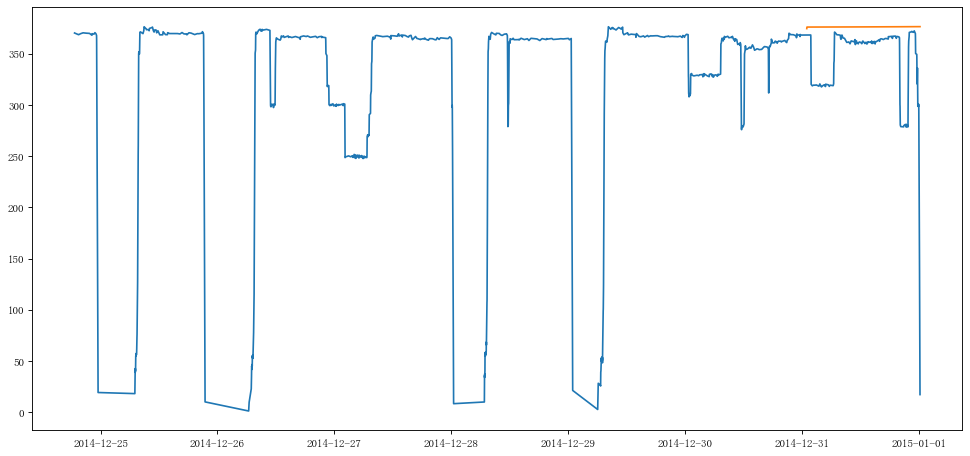

In [151]:
plt.figure(figsize = (15, 7), dpi = 80)
plt.plot(data['时间'],data['联合循环功率'])
print(origin_pred_test.shape)
plt.plot(data['时间'].tail(1396),origin_pred_test)
plt.plot()
plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler
# 归一化处理
scaler = MinMaxScaler(feature_range=(-1, 1))
train_norm = scaler.fit_transform(X.reshape(-1, 1))
train_norm[0:5]

array([[0.99999994],
       [0.99989814],
       [0.9995355 ],
       [0.9994847 ],
       [0.9990713 ]], dtype=float32)

In [65]:
test_size = X.shape[0]//5
train_norm = y[:-test_size]
test_set = y[-test_size:]

In [66]:
import torch
train_norm = torch.FloatTensor(train_norm).view(-1)
print(train_norm.size())
# 转换成 tensor
train_norm = torch.FloatTensor(train_norm).view(-1)
window_size = 12
#将数据按window_size一组分段，每次输入一段后，会输出一个预测的值y_pred
#y_pred与每段之后的window_size+1个数据作为对比值，用于计算损失函数
#例如前5个数据为(1,2,3,4,5),取前4个进行CNN预测,得出的值与(5)比较计算loss
#这里使用每组13个数据,最后一个数据作评估值,即window_size=12
def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    return out
train_data = input_data(train_norm,window_size)
# 打印一组数据集
train_data[0]


torch.Size([6954])


(tensor([376.4062, 376.3871, 376.3191, 376.3096, 376.2320, 376.2320, 376.1585,
         376.1544, 376.1448, 376.1064, 376.0816, 376.0769]),
 tensor([376.0577]))

In [73]:
import torch
import torch.nn as nn
class CNNnetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1d = nn.Conv1d(1,64,kernel_size=2)
        self.relu = nn.ReLU(inplace=True)
        self.Linear1= nn.Linear(64*11,50)
        self.Linear2= nn.Linear(50,1)      
    def forward(self,x):
        x = self.conv1d(x)
        x = self.relu(x)
        x = x.view(-1)
        x = self.Linear1(x)
        x = self.relu(x)
        x = self.Linear2(x)
        return x



In [74]:
import time
torch.manual_seed(101)
model =CNNnetwork()
# 设置损失函数,这里使用的是均方误差损失
criterion = nn.MSELoss()
# 设置优化函数和学习率lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) 
# 设置训练周期
epochs = 20
model.train()
start_time = time.time()
for epoch in range(epochs):
    for seq, y_train in train_data:
        # 每次更新参数前都梯度归零和初始化
        optimizer.zero_grad()
        # 注意这里要对样本进行reshape，
        # 转换成conv1d的input size（batch size, channel, series length）
        y_pred = model(seq.reshape(1,1,-1))
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()        
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')  
print(f'\nDuration: {time.time() - start_time:.0f} seconds')


Epoch:  1 Loss: 0.02420470
Epoch:  2 Loss: 0.02995156
Epoch:  3 Loss: 0.25456780
Epoch:  4 Loss: 0.07590725
Epoch:  5 Loss: 0.00391388
Epoch:  6 Loss: 0.00001852
Epoch:  7 Loss: 0.00175822
Epoch:  8 Loss: 0.05393485
Epoch:  9 Loss: 2.20264435
Epoch: 10 Loss: 0.23660411
Epoch: 11 Loss: 0.13642256
Epoch: 12 Loss: 0.04826635
Epoch: 13 Loss: 0.04656523
Epoch: 14 Loss: 0.00684477
Epoch: 15 Loss: 0.03560399
Epoch: 16 Loss: 0.01288801
Epoch: 17 Loss: 0.01684577
Epoch: 18 Loss: 0.02272762
Epoch: 19 Loss: 0.02783545
Epoch: 20 Loss: 0.02470100

Duration: 181 seconds


(1738, 1)


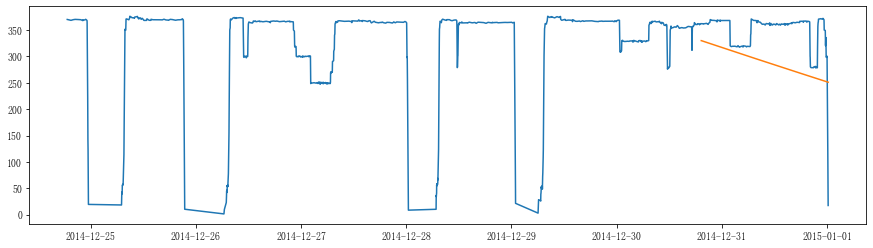

In [77]:
window_size = 12
future = 1738
# 选取序列最后12个值开始预测
preds = train_norm[-window_size:].tolist()
#print(preds)
# 设置成eval模式
model.eval()

# 循环的每一步表示向时间序列向后滑动一格
for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        preds.append(model(seq.reshape(1,1,-1)).item())

# 逆归一化还原真实值
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
x = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
print(x.shape)
plt.figure(figsize=(15,4))
plt.plot(data['时间'],data['联合循环功率'])
plt.plot(data['时间'].tail(1738),true_predictions)
plt.show()

In [78]:
mse_test=np.sum((true_predictions-test_set)**2)/len(test_set)
print(mse_test)
print(mse_test**0.5)
mae_test=np.sum(np.absolute(true_predictions-test_set))/len(test_set)
print(mae_test)

13265995.772835901
3642.2514702908557
96175.53194473816


In [41]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv1 = nn.Conv1d(256,100,kernel_size=2)
input = torch.randn(32,35,256)
# batch_size x text_len x embedding_size -> batch_size x embedding_size x text_len
input = input.permute(0,2,1)
out = conv1(input)
print(out.size())

torch.Size([32, 100, 34])


In [ ]:
test1 = df[['时间','联合循环功率']]
test1.plot()

In [ ]:
plt.figure(figsize = (15, 7))
plt.plot(df['时间'],df['联合循环功率'])

plt.show()